<a href="https://colab.research.google.com/github/SantiagoArce7/CIENCIA_DATOS_2025/blob/main/Ejercicio_Preguntas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

df = pd.read_csv("/content/patients.csv")

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   patient_id      1000 non-null   object
 1   name            1000 non-null   object
 2   age             1000 non-null   int64 
 3   arrival_date    1000 non-null   object
 4   departure_date  1000 non-null   object
 5   service         1000 non-null   object
 6   satisfaction    1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


,patient_id,name,age,arrival_date,departure_date,service,satisfaction
0,PAT-09484753,Richard Rodriguez,24,2025-03-16,2025-03-22,surgery,61
1,PAT-f0644084,Shannon Walker,6,2025-12-13,2025-12-14,surgery,83
2,PAT-ac6162e4,Julia Torres,24,2025-06-29,2025-07-05,general_medicine,83
3,PAT-3dda2bb5,Crystal Johnson,32,2025-10-12,2025-10-23,emergency,81
4,PAT-08591375,Garrett Lin,25,2025-02-18,2025-02-25,ICU,76


In [3]:
df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df['departure_date'] = pd.to_datetime(df['departure_date'])
df['service'] = df['service'].astype('category')

df.dtypes


,0
patient_id,object
name,object
age,int64
arrival_date,datetime64[ns]
departure_date,datetime64[ns]
service,category
satisfaction,int64


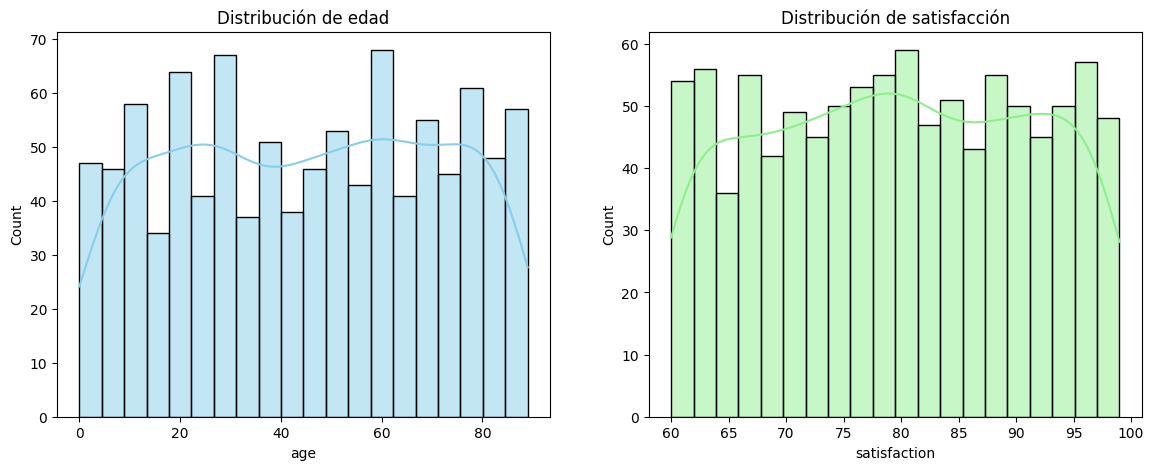

In [6]:

df[['age', 'satisfaction']].describe()

fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.histplot(df['age'], bins=20, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title("Distribución de edad")

sns.histplot(df['satisfaction'], bins=20, kde=True, color='lightgreen', ax=axes[1])
axes[1].set_title("Distribución de satisfacción")

plt.show()


##Tanto la edad como la satisfacción presentan distribuciones amplias y relativamente homogéneas.
Esto significa que no hay grupos dominantes

Coeficiente de correlación: -0.056
Valor p: 0.0755


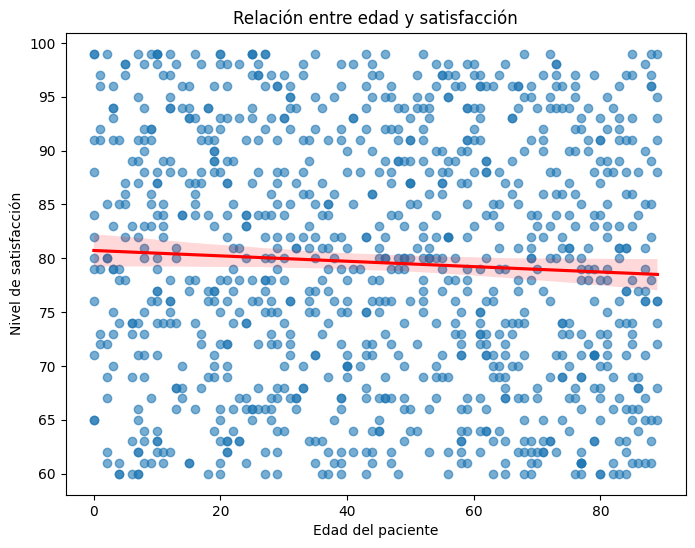

In [7]:
corr, pval = pearsonr(df['age'], df['satisfaction'])
print(f"Coeficiente de correlación: {corr:.3f}")
print(f"Valor p: {pval:.4f}")

plt.figure(figsize=(8,6))
sns.regplot(x='age', y='satisfaction', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title("Relación entre edad y satisfacción")
plt.xlabel("Edad del paciente")
plt.ylabel("Nivel de satisfacción")
plt.show()


## No se observa una relación fuerte entre la edad y el nivel de satisfacción del paciente.
Aunque la tendencia general muestra una ligera disminución de satisfacción con la edad, la dispersión alta de los puntos sugiere que la relación es muy débil o casi nula.